In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, complete

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("features.csv")
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2012-11-09,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,False
1,1,2012-11-16,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,False
2,1,2012-11-23,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,True
3,1,2012-11-30,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,False
4,1,2012-12-07,64.12,3.198,6343.16,NaN,270.00,2928.90,10147.90,223.660021,6.573,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         10 non-null     int64  
 1   Date          10 non-null     object 
 2   Temperature   10 non-null     float64
 3   Fuel_Price    10 non-null     float64
 4   MarkDown1     10 non-null     float64
 5   MarkDown2     6 non-null      float64
 6   MarkDown3     10 non-null     float64
 7   MarkDown4     10 non-null     float64
 8   MarkDown5     10 non-null     float64
 9   CPI           10 non-null     float64
 10  Unemployment  10 non-null     float64
 11  IsHoliday     10 non-null     bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 1018.0+ bytes


In [6]:
standarirasi = df.copy()

In [7]:
standarirasi.drop(['Store','Date'], axis=1, inplace=True)

standarirasi

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,False
1,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,False
2,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,True
3,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,False
4,64.12,3.198,6343.16,NaN,270.00,2928.90,10147.90,223.660021,6.573,False
5,48.89,3.168,3504.83,NaN,73.26,1636.80,2779.60,223.719277,6.573,False
6,56.02,3.098,8231.71,NaN,274.00,358.15,2834.02,223.839845,6.573,False
7,44.79,3.108,12659.55,37101.13,174.78,74.46,1208.86,223.960414,6.573,True
8,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525,False
9,50.32,3.243,6520.24,16134.60,12.17,774.55,4001.25,224.201552,6.525,False


In [8]:
standarirasi_Iris = standarirasi.loc[:]
standarirasi_Iris.head()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,False
1,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,False
2,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,True
3,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,False
4,64.12,3.198,6343.16,NaN,270.00,2928.90,10147.90,223.660021,6.573,False


In [9]:
model = KMeans(n_clusters=3)

standarirasi_Iris["IsHoliday"] = standarirasi_Iris.IsHoliday
points = standarirasi_Iris[["Temperature","Fuel_Price"]]

model.fit(points)

labels = model.labels_ 

print(labels)

[1 0 0 0 1 0 0 2 2 0]


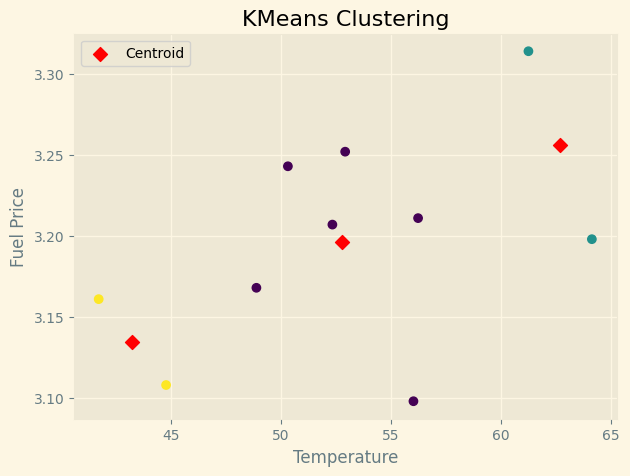

In [10]:
plt.style.use('Solarize_Light2')

ctr = model.cluster_centers_

ctr_x = ctr[:,0]
ctr_y = ctr[:,1]

plt.figure(1, figsize=(7,5))
plt.scatter(points["Temperature"], points["Fuel_Price"], alpha=1, c=labels)
plt.scatter(ctr_x, ctr_y, marker="D", s=50, label="Centroid", c='red')

plt.title("KMeans Clustering")
plt.xlabel("Temperature")
plt.ylabel("Fuel Price")
plt.legend()

plt.show()

In [11]:
dsk_Iris = pd.DataFrame({"labels": labels,"country": standarirasi_Iris.IsHoliday})
ct_Iris = pd.crosstab(dsk_Iris["labels"], dsk_Iris["country"])
ct_Iris

country,False,True
labels,,
0,5,1
1,2,0
2,1,1


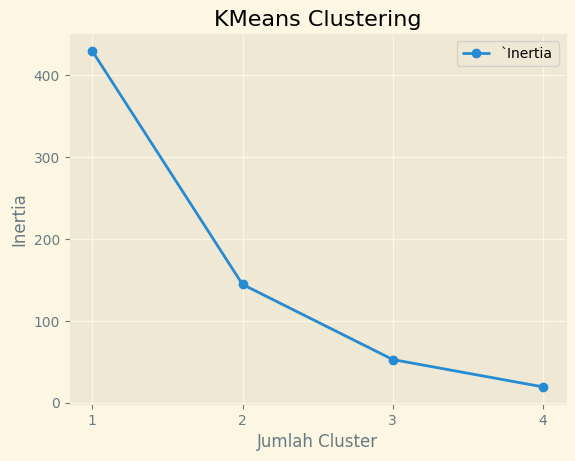

In [12]:
cluster_sum = range(1,5)
inertia = []

for cluster in cluster_sum:
    model = KMeans(n_clusters=cluster)
    model.fit(points)
    inertia.append(model.inertia_)
    
plt.plot(cluster_sum, inertia, '-o', label="`Inertia")
plt.xticks(cluster_sum)

plt.title("KMeans Clustering")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.legend()

plt.show()